<a href="https://colab.research.google.com/github/RogerReateguiUTEC/TareasIAFundamentals/blob/main/Practica2_ProblemaDeLaMochila_SimulatedAnnealing_HillClimbing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Definición de los items y la capacidad de la mochila

In [14]:
import random
import math

In [15]:
#Definimos los items:
#Cada item tendrá un "valor" entre 10 y 100
#Cada item tendrá un peso entre 1 y 10

cantidadDeItems = 100

listaDeValores = [random.randint(10, 100) for _ in range(cantidadDeItems)]
listaDePesos = [random.randint(1, 10) for _ in range(cantidadDeItems)]

items = []

for x in range(cantidadDeItems):
  diccionario = {'valor': listaDeValores[x], 'peso': listaDePesos[x]}
  items.append(diccionario)
items

[{'valor': 17, 'peso': 2},
 {'valor': 76, 'peso': 9},
 {'valor': 54, 'peso': 6},
 {'valor': 90, 'peso': 8},
 {'valor': 47, 'peso': 9},
 {'valor': 86, 'peso': 1},
 {'valor': 57, 'peso': 9},
 {'valor': 65, 'peso': 1},
 {'valor': 19, 'peso': 6},
 {'valor': 72, 'peso': 10},
 {'valor': 32, 'peso': 4},
 {'valor': 12, 'peso': 4},
 {'valor': 76, 'peso': 10},
 {'valor': 63, 'peso': 3},
 {'valor': 40, 'peso': 2},
 {'valor': 32, 'peso': 9},
 {'valor': 24, 'peso': 1},
 {'valor': 100, 'peso': 4},
 {'valor': 96, 'peso': 8},
 {'valor': 59, 'peso': 10},
 {'valor': 35, 'peso': 2},
 {'valor': 18, 'peso': 4},
 {'valor': 73, 'peso': 3},
 {'valor': 13, 'peso': 2},
 {'valor': 15, 'peso': 5},
 {'valor': 39, 'peso': 2},
 {'valor': 92, 'peso': 5},
 {'valor': 60, 'peso': 4},
 {'valor': 33, 'peso': 4},
 {'valor': 80, 'peso': 5},
 {'valor': 56, 'peso': 4},
 {'valor': 96, 'peso': 10},
 {'valor': 76, 'peso': 1},
 {'valor': 22, 'peso': 2},
 {'valor': 42, 'peso': 7},
 {'valor': 95, 'peso': 3},
 {'valor': 87, 'peso': 

In [17]:
print(f"Valores total: {sum(listaDeValores)}")
print(f"Pesos total: {sum(listaDePesos)}")

Valores total: 5565
Pesos total: 509


In [18]:
#La mochila tendrá una capacidad en peso igual al 60% del peso total de los items:
capacidad_mochila_en_peso = int(sum(listaDePesos)*0.6)
capacidad_mochila_en_peso

305

#Simulated Annealing

In [19]:
def evaluarSolucion(solucion):
    """
    Esta función retorna el 'valor' total de la solución que se está evaluando en ese instante
    Parámetros:
    * solucion: Arreglo en forma de lista con valores 1 y 0, donde un 1 en el índice i representa a que el item en 'items[i]'
    sí se incluye en la mochila, mientras que 0 significa que no se incluye.
    """
    valorTotal = sum(items[i]['valor'] for i in range(len(solucion)) if solucion[i] == 1)
    pesoTotal = sum(items[i]['peso'] for i in range(len(solucion)) if solucion[i] == 1)
    if pesoTotal > capacidad_mochila_en_peso:
        return 0 #si el total del peso de los items es mayor que la capacidad de la mochila, retornamos un 0 para hacer la solución no óptima
    return valorTotal

In [20]:
def simulated_annealing():
    """
    Esta función retorna los resultados de aplicar simulated annealing al problema de optimización planteado
    """
    # Creamos una solución aleatoria inicial:
    solucionActual = [random.choice([0, 1]) for _ in items] #creamos una lista aleatoria de 1 y 0 del mismo tamaño que el diccionario items
    valorActual = evaluarSolucion(solucionActual) #evaluamos cuánto de valor nos retorna la solución actual

    T = 1000  # Temperatura inicial
    T_min = 0.0001  # Temperatura mínima
    alpha = 0.99  # Factor de enfriamiento

    mejorSolucionHastaElMomento = solucionActual[:]
    mejorValorHastaElMomento = valorActual

    print(f"solucion 1: {solucionActual} la cual tiene el valor total de {valorActual} (Temperatura:{T})")
    values_over_time = [valorActual] #almacenamos los valores para luego graficarlos

    contador = 2
    while T > T_min:
        # Generar una nueva solución vecina modificando un elemento al azar
        nuevaSolucion = solucionActual[:]
        i = random.randint(0, len(items) - 1)
        nuevaSolucion[i] = 1 if nuevaSolucion[i]==0 else 0 #Si esta posición es 0, cambiar a 1, y visceversa.
        nuevoValor = evaluarSolucion(nuevaSolucion)

        print(f"solucion {contador}: {nuevaSolucion} la cual tiene el valor total de {nuevoValor} (Temperatura:{T})")
        contador = contador + 1

        # Verificar si la nueva solución se acepta o no:
        delta = nuevoValor - valorActual
        #Si el delta es > 0 significa que la solución nueva es mejor y por lo tanto se acepta
        #Si el delta es < 0, significa que la solución nueva es peor, por lo que se utiliza random.random() < math.exp(delta / T) para ver si se acepta o no
        if delta > 0 or random.random() < math.exp(delta / T):
            solucionActual = nuevaSolucion[:]
            valorActual = nuevoValor

        # Actualizar la mejor solución encontrada
        if valorActual > mejorValorHastaElMomento:
            mejorSolucionHastaElMomento = solucionActual[:]
            mejorValorHastaElMomento = valorActual

        # Guardar el valor actual para la gráfica
        values_over_time.append(valorActual)

        # Reducir la temperatura
        T = T * alpha

    return mejorSolucionHastaElMomento, mejorValorHastaElMomento, values_over_time

In [21]:
%%time
# Ejecutar la función
solution, value, values_over_time = simulated_annealing()
print("Mejor solución encontrada:", solution)
print("Valor total:", value)
#Mejor solución encontrada: [0, 1, 0, 1]
#Valor total: 90

solucion 1: [1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1] la cual tiene el valor total de 3025 (Temperatura:1000)
solucion 2: [1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1] la cual tiene el valor total de 2973 (Temperatura:1000)
solucion 3: [1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 

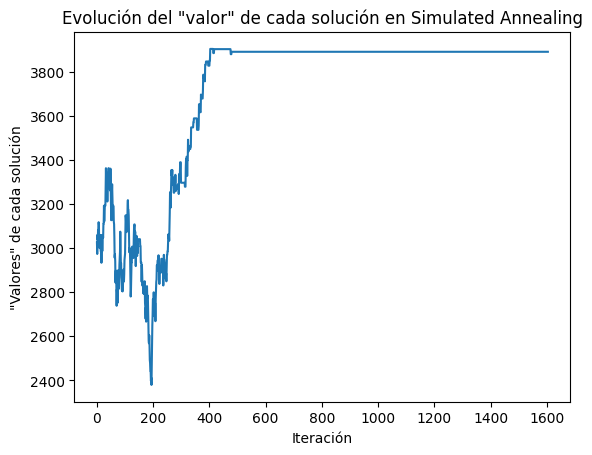

In [22]:
# Graficar la evolución del valor de la solución
import matplotlib.pyplot as plt

plt.plot(values_over_time)
plt.xlabel('Iteración')
plt.ylabel('"Valores" de cada solución')
plt.title('Evolución del "valor" de cada solución en Simulated Annealing')
plt.show()